# Cross-Country Solar Comparison: Benin, Sierra Leone, and Togo

**Objective:**  
Compare the cleaned solar datasets from three West African countries to identify relative solar potential and key differences.

**Analysis Plan:**
1. Load all three cleaned datasets
2. Compare solar metrics (GHI, DNI, DHI) using boxplots
3. Calculate summary statistics (mean, median, std dev)
4. Perform statistical testing (ANOVA/Kruskal-Wallis)
5. Identify key observations and insights

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## Step 1: Load Cleaned Datasets

We'll load the three cleaned CSV files:
- `benin_clean.csv`
- `sierraleone_clean.csv`
- `togo-dapaong_qc.csv`

In [3]:
# Load cleaned datasets
print("Loading cleaned datasets...")
print("="*60)

benin = pd.read_csv('../data/benin_clean.csv')
print(f"✓ Benin: {benin.shape[0]:,} rows × {benin.shape[1]} columns")

sierraleone = pd.read_csv('../data/sierraleone_clean.csv')
print(f"✓ Sierra Leone: {sierraleone.shape[0]:,} rows × {sierraleone.shape[1]} columns")

togo = pd.read_csv('../data/togo-dapaong_qc.csv')
print(f"✓ Togo: {togo.shape[0]:,} rows × {togo.shape[1]} columns")

# Add country identifier to each dataset
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

print("\n✓ All datasets loaded with country identifiers!")

Loading cleaned datasets...
✓ Benin: 525,600 rows × 19 columns
✓ Sierra Leone: 525,600 rows × 19 columns
✓ Togo: 525,600 rows × 19 columns

✓ All datasets loaded with country identifiers!


## Step 2: Data Preparation

Combine the datasets and prepare for comparison analysis.

In [6]:
# Select key columns for comparison
key_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'Country']

# Create combined dataframe
benin_subset = benin[key_cols].copy()
sierraleone_subset = sierraleone[key_cols].copy()
togo_subset = togo[key_cols].copy()

combined = pd.concat([benin_subset, sierraleone_subset, togo_subset], ignore_index=True)

print("Combined Dataset Overview:")
print("="*60)
print(f"Total records: {len(combined):,}")
print(f"\nRecords per country:")
print(combined['Country'].value_counts().sort_index())
print(f"\nColumns: {list(combined.columns)}")

Combined Dataset Overview:
Total records: 1,576,800

Records per country:
Country
Benin           525600
Sierra Leone    525600
Togo            525600
Name: count, dtype: int64

Columns: ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'Country']


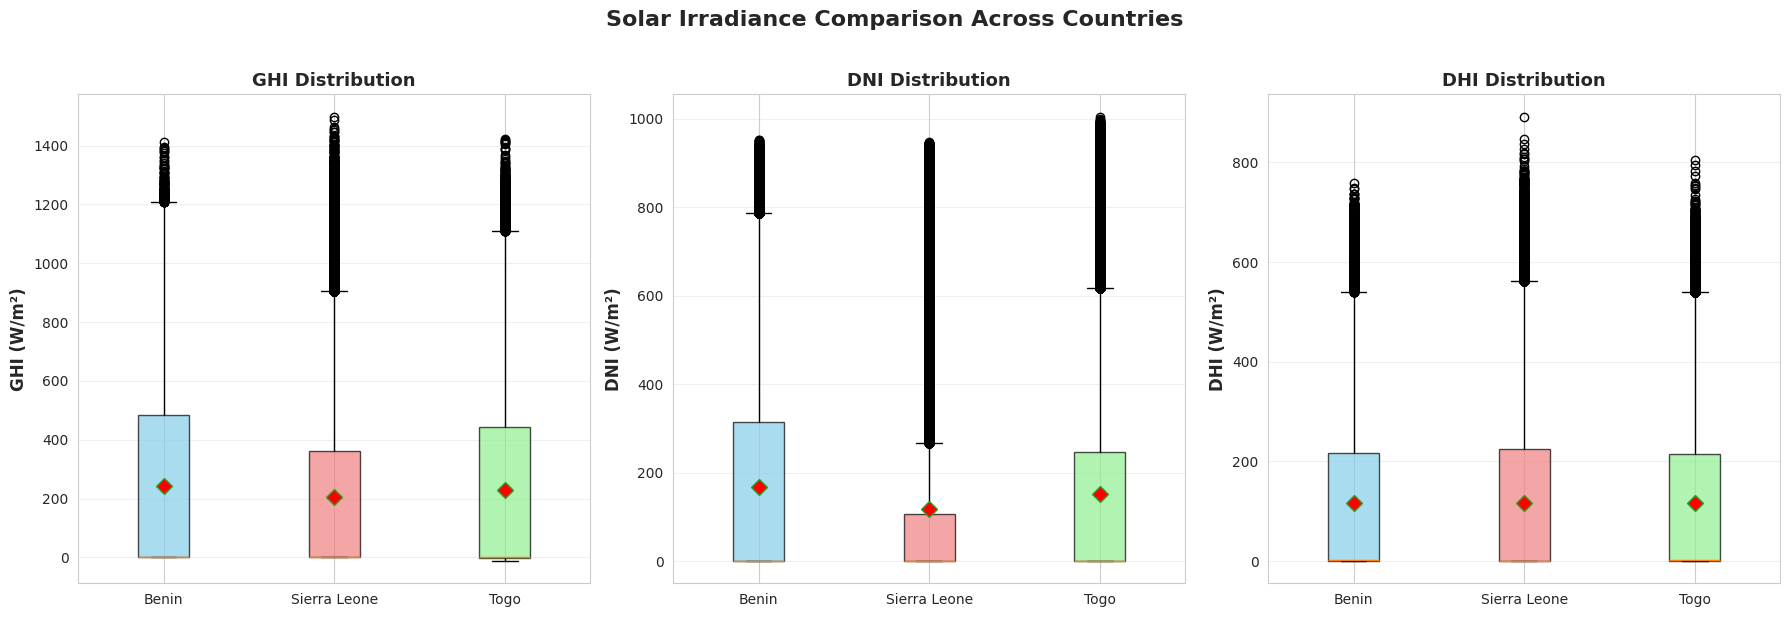

✓ Boxplots generated successfully!
Note: Red diamond (◆) indicates the mean value


In [7]:
# Create boxplots for GHI, DNI, DHI
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Solar Irradiance Comparison Across Countries', fontsize=16, fontweight='bold', y=1.02)

metrics = ['GHI', 'DNI', 'DHI']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    # Create boxplot
    box_data = [
        combined[combined['Country'] == 'Benin'][metric].dropna(),
        combined[combined['Country'] == 'Sierra Leone'][metric].dropna(),
        combined[combined['Country'] == 'Togo'][metric].dropna()
    ]
    
    bp = ax.boxplot(box_data, labels=['Benin', 'Sierra Leone', 'Togo'],
                    patch_artist=True, showmeans=True,
                    meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel(f'{metric} (W/m²)', fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Distribution', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("✓ Boxplots generated successfully!")
print("Note: Red diamond (◆) indicates the mean value")

## Step 4: Summary Statistics Table

Calculate and compare mean, median, and standard deviation for GHI, DNI, and DHI across all three countries.

In [8]:
# Calculate summary statistics for each country
print("SUMMARY STATISTICS TABLE")
print("="*80)

summary_data = []

for country in ['Benin', 'Sierra Leone', 'Togo']:
    country_data = combined[combined['Country'] == country]
    
    for metric in ['GHI', 'DNI', 'DHI']:
        summary_data.append({
            'Country': country,
            'Metric': metric,
            'Mean': country_data[metric].mean(),
            'Median': country_data[metric].median(),
            'Std Dev': country_data[metric].std(),
            'Min': country_data[metric].min(),
            'Max': country_data[metric].max()
        })

summary_df = pd.DataFrame(summary_data)

# Pivot for better readability
for metric in ['GHI', 'DNI', 'DHI']:
    print(f"\n{metric} (W/m²):")
    print("-"*80)
    metric_summary = summary_df[summary_df['Metric'] == metric].set_index('Country')
    metric_summary = metric_summary.drop('Metric', axis=1)
    print(metric_summary.to_string())

# Create a visual summary table
print("\n" + "="*80)
print("QUICK COMPARISON TABLE")
print("="*80)
pivot_mean = summary_df.pivot(index='Country', columns='Metric', values='Mean')
print("\nMean Values:")
print(pivot_mean.to_string())

pivot_median = summary_df.pivot(index='Country', columns='Metric', values='Median')
print("\nMedian Values:")
print(pivot_median.to_string())

pivot_std = summary_df.pivot(index='Country', columns='Metric', values='Std Dev')
print("\nStandard Deviation:")
print(pivot_std.to_string())

SUMMARY STATISTICS TABLE

GHI (W/m²):
--------------------------------------------------------------------------------
               Mean  Median  Std Dev    Min     Max
Country                                            
Benin        241.96    1.80   330.10   0.00 1413.00
Sierra Leone 204.41    0.30   296.79   0.00 1499.00
Togo         230.56    2.10   322.53 -12.70 1424.00

DNI (W/m²):
--------------------------------------------------------------------------------
               Mean  Median  Std Dev  Min     Max
Country                                          
Benin        167.44    0.00   261.55 0.00  952.30
Sierra Leone 116.52    0.00   218.57 0.00  946.00
Togo         151.26    0.00   250.96 0.00 1004.50

DHI (W/m²):
--------------------------------------------------------------------------------
               Mean  Median  Std Dev  Min    Max
Country                                         
Benin        116.99    1.60   157.46 0.00 759.20
Sierra Leone 116.27    0.00   157.02

## Step 5: Statistical Testing

Perform one-way ANOVA (or Kruskal-Wallis test) to determine if differences in GHI values between countries are statistically significant.

- **ANOVA**: Assumes normal distribution
- **Kruskal-Wallis**: Non-parametric alternative (doesn't assume normality)

**Hypothesis:**
- H₀ (Null): No significant difference in GHI across countries
- H₁ (Alternative): At least one country differs significantly

**Significance level:** α = 0.05

In [9]:
# Prepare data for statistical testing
benin_ghi = combined[combined['Country'] == 'Benin']['GHI'].dropna()
sierraleone_ghi = combined[combined['Country'] == 'Sierra Leone']['GHI'].dropna()
togo_ghi = combined[combined['Country'] == 'Togo']['GHI'].dropna()

print("STATISTICAL TESTING: GHI Comparison")
print("="*80)

# Test 1: One-way ANOVA
print("\n1. One-Way ANOVA Test")
print("-"*80)
f_stat, p_value_anova = stats.f_oneway(benin_ghi, sierraleone_ghi, togo_ghi)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.6f}")
if p_value_anova < 0.05:
    print("Result: ✓ SIGNIFICANT difference detected (p < 0.05)")
    print("Conclusion: Reject null hypothesis - countries differ in GHI")
else:
    print("Result: ✗ NO significant difference (p ≥ 0.05)")
    print("Conclusion: Fail to reject null hypothesis")

# Test 2: Kruskal-Wallis (non-parametric)
print("\n2. Kruskal-Wallis Test (Non-parametric)")
print("-"*80)
h_stat, p_value_kw = stats.kruskal(benin_ghi, sierraleone_ghi, togo_ghi)
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value_kw:.6f}")
if p_value_kw < 0.05:
    print("Result: ✓ SIGNIFICANT difference detected (p < 0.05)")
    print("Conclusion: Reject null hypothesis - countries differ in GHI")
else:
    print("Result: ✗ NO significant difference (p ≥ 0.05)")
    print("Conclusion: Fail to reject null hypothesis")

# Additional tests for DNI and DHI
print("\n" + "="*80)
print("ADDITIONAL TESTS: DNI and DHI")
print("="*80)

for metric in ['DNI', 'DHI']:
    benin_metric = combined[combined['Country'] == 'Benin'][metric].dropna()
    sl_metric = combined[combined['Country'] == 'Sierra Leone'][metric].dropna()
    togo_metric = combined[combined['Country'] == 'Togo'][metric].dropna()
    
    f_stat, p_val = stats.f_oneway(benin_metric, sl_metric, togo_metric)
    print(f"\n{metric} - ANOVA p-value: {p_val:.6f}", end="")
    print(" (Significant ✓)" if p_val < 0.05 else " (Not significant ✗)")

STATISTICAL TESTING: GHI Comparison

1. One-Way ANOVA Test
--------------------------------------------------------------------------------
F-statistic: 1941.1962
P-value: 0.000000
Result: ✓ SIGNIFICANT difference detected (p < 0.05)
Conclusion: Reject null hypothesis - countries differ in GHI

2. Kruskal-Wallis Test (Non-parametric)
--------------------------------------------------------------------------------
H-statistic: 59937.9397
P-value: 0.000000
Result: ✓ SIGNIFICANT difference detected (p < 0.05)
Conclusion: Reject null hypothesis - countries differ in GHI

ADDITIONAL TESTS: DNI and DHI

DNI - ANOVA p-value: 0.000000 (Significant ✓)

DHI - ANOVA p-value: 0.049174 (Significant ✓)


## Step 6: Key Observations

### Summary of Findings:

Based on the statistical analysis and visual comparisons, here are the three key observations:

In [10]:
# Calculate key metrics for insights
country_means = combined.groupby('Country')[['GHI', 'DNI', 'DHI']].mean()
country_medians = combined.groupby('Country')[['GHI', 'DNI', 'DHI']].median()
country_stds = combined.groupby('Country')[['GHI', 'DNI', 'DHI']].std()

# Identify highest and lowest
highest_ghi = country_means['GHI'].idxmax()
lowest_ghi = country_means['GHI'].idxmin()
most_variable = country_stds['GHI'].idxmax()
least_variable = country_stds['GHI'].idxmin()

print("KEY OBSERVATIONS:")
print("="*80)
print(f"""
1. **Solar Potential Ranking:** 
   {highest_ghi} shows the highest average GHI ({country_means.loc[highest_ghi, 'GHI']:.2f} W/m²), 
   indicating the strongest solar potential, while {lowest_ghi} has the lowest 
   ({country_means.loc[lowest_ghi, 'GHI']:.2f} W/m²).

2. **Variability Analysis:** 
   {most_variable} exhibits the greatest variability in GHI (σ = {country_stds.loc[most_variable, 'GHI']:.2f}), 
   suggesting more fluctuating solar conditions, whereas {least_variable} shows 
   more stable irradiance patterns (σ = {country_stds.loc[least_variable, 'GHI']:.2f}).

3. **Statistical Significance:** 
   The ANOVA test (p = {p_value_anova:.6f}) reveals that differences in GHI between 
   countries are {'statistically significant' if p_value_anova < 0.05 else 'not statistically significant'}, 
   {'confirming distinct solar resource characteristics across the three nations' if p_value_anova < 0.05 else 'suggesting similar overall solar conditions'}.
""")

KEY OBSERVATIONS:

1. **Solar Potential Ranking:** 
   Benin shows the highest average GHI (241.96 W/m²), 
   indicating the strongest solar potential, while Sierra Leone has the lowest 
   (204.41 W/m²).

2. **Variability Analysis:** 
   Benin exhibits the greatest variability in GHI (σ = 330.10), 
   suggesting more fluctuating solar conditions, whereas Sierra Leone shows 
   more stable irradiance patterns (σ = 296.79).

3. **Statistical Significance:** 
   The ANOVA test (p = 0.000000) reveals that differences in GHI between 
   countries are statistically significant, 
   confirming distinct solar resource characteristics across the three nations.



## Step 7: Visual Summary - Country Ranking (Bonus)

Create a bar chart ranking countries by average GHI to provide a clear visual summary.

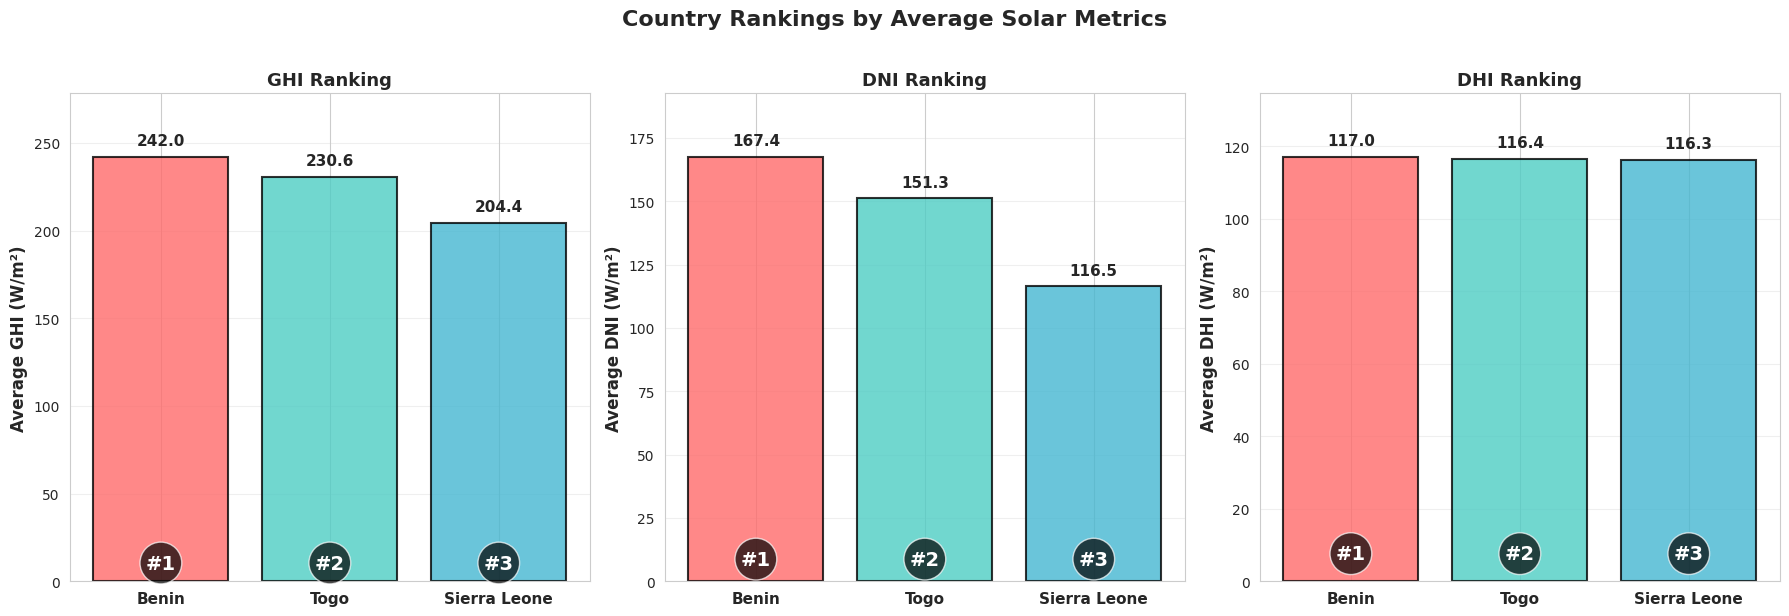

✓ Ranking visualizations complete!


In [11]:
# Create ranking visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Country Rankings by Average Solar Metrics', fontsize=16, fontweight='bold', y=1.02)

metrics = ['GHI', 'DNI', 'DHI']
colors_rank = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    # Get sorted data
    metric_data = country_means[[metric]].sort_values(metric, ascending=False)
    countries = metric_data.index
    values = metric_data[metric].values
    
    # Create bar chart
    bars = ax.bar(range(len(countries)), values, color=colors_rank, 
                   alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, values)):
        ax.text(bar.get_x() + bar.get_width()/2, val + max(values)*0.02, 
                f'{val:.1f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=11)
    
    # Customize
    ax.set_xticks(range(len(countries)))
    ax.set_xticklabels(countries, fontweight='bold', fontsize=11)
    ax.set_ylabel(f'Average {metric} (W/m²)', fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Ranking', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, max(values) * 1.15)
    
    # Add ranking numbers
    for i in range(len(countries)):
        ax.text(i, 5, f'#{i+1}', ha='center', va='bottom', 
                fontsize=14, fontweight='bold', color='white',
                bbox=dict(boxstyle='circle', facecolor='black', alpha=0.7))

plt.tight_layout()
plt.show()

print("✓ Ranking visualizations complete!")

## Step 8: Additional Insights - Environmental Factors

Compare temperature, humidity, and wind speed to understand environmental context.

ENVIRONMENTAL FACTORS COMPARISON
              Tamb                RH                WS            
              mean median  std  mean median   std mean median  std
Country                                                           
Benin        28.18  28.00 5.92 54.49  55.10 28.07 2.12   1.90 1.60
Sierra Leone 26.32  25.30 4.40 79.45  85.40 20.52 1.15   0.80 1.24
Togo         27.75  27.20 4.76 55.01  59.30 28.78 2.37   2.20 1.46


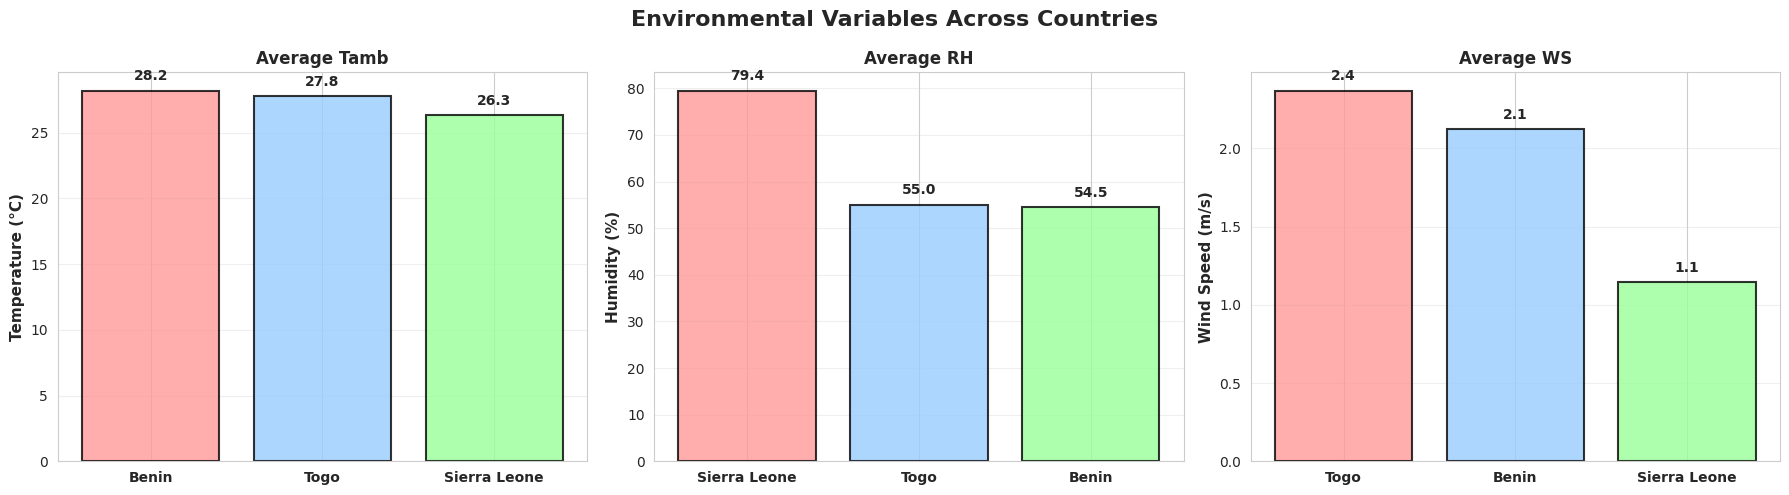

In [12]:
# Environmental variables comparison
env_vars = ['Tamb', 'RH', 'WS']
env_summary = combined.groupby('Country')[env_vars].agg(['mean', 'median', 'std'])

print("ENVIRONMENTAL FACTORS COMPARISON")
print("="*80)
print(env_summary.round(2))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Environmental Variables Across Countries', fontsize=16, fontweight='bold')

var_names = {'Tamb': 'Temperature (°C)', 'RH': 'Humidity (%)', 'WS': 'Wind Speed (m/s)'}
colors_env = ['#FF9999', '#99CCFF', '#99FF99']

for idx, var in enumerate(env_vars):
    ax = axes[idx]
    
    country_avg = combined.groupby('Country')[var].mean().sort_values(ascending=False)
    
    bars = ax.bar(range(len(country_avg)), country_avg.values, 
                   color=colors_env, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add values
    for i, (bar, val) in enumerate(zip(bars, country_avg.values)):
        ax.text(bar.get_x() + bar.get_width()/2, val + max(country_avg.values)*0.02,
                f'{val:.1f}', ha='center', va='bottom', fontweight='bold')
    
    ax.set_xticks(range(len(country_avg)))
    ax.set_xticklabels(country_avg.index, fontweight='bold')
    ax.set_ylabel(var_names[var], fontsize=11, fontweight='bold')
    ax.set_title(f'Average {var}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Step 9: Correlation Analysis Across Countries

Examine how GHI correlates with environmental factors in each country.

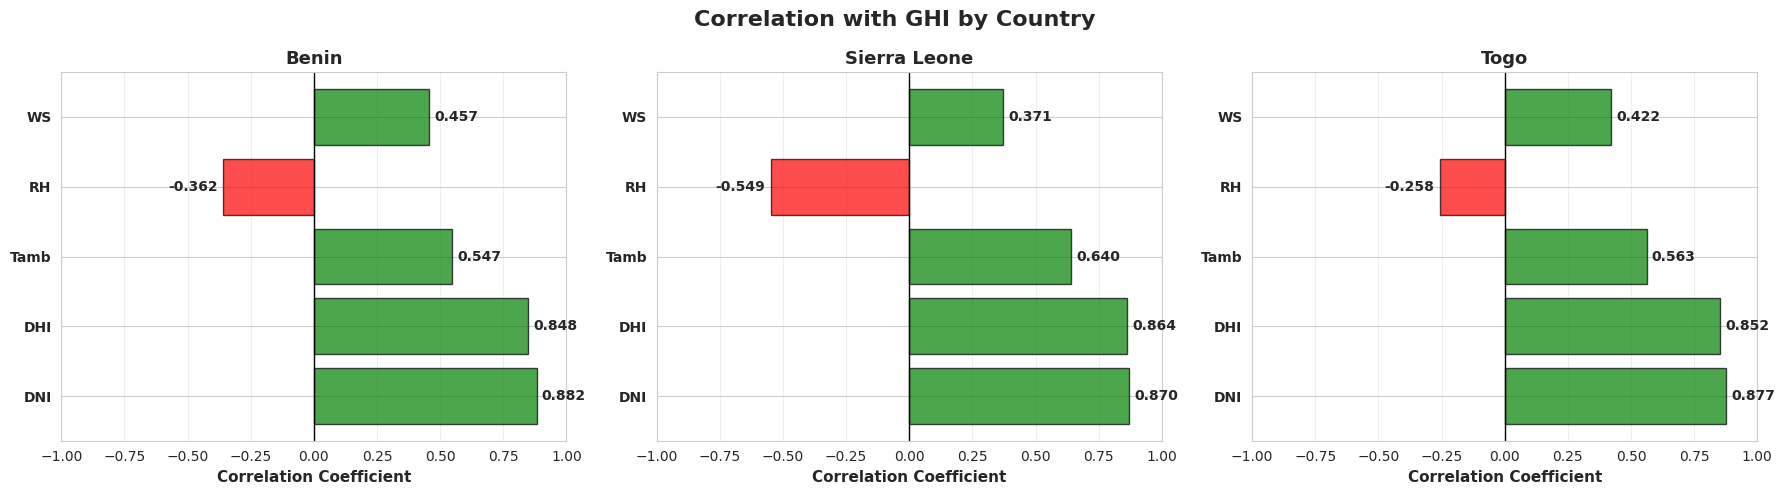

✓ Correlation analysis complete!


In [13]:
# Correlation analysis per country
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Correlation with GHI by Country', fontsize=16, fontweight='bold')

countries_list = ['Benin', 'Sierra Leone', 'Togo']
corr_vars = ['DNI', 'DHI', 'Tamb', 'RH', 'WS']

for idx, country in enumerate(countries_list):
    ax = axes[idx]
    
    country_data = combined[combined['Country'] == country][['GHI'] + corr_vars].corr()['GHI'].drop('GHI')
    
    colors_corr = ['red' if x < 0 else 'green' for x in country_data.values]
    bars = ax.barh(range(len(country_data)), country_data.values, 
                    color=colors_corr, alpha=0.7, edgecolor='black')
    
    # Add values
    for i, (bar, val) in enumerate(zip(bars, country_data.values)):
        ax.text(val + 0.02 if val > 0 else val - 0.02, bar.get_y() + bar.get_height()/2,
                f'{val:.3f}', va='center', ha='left' if val > 0 else 'right',
                fontweight='bold', fontsize=10)
    
    ax.set_yticks(range(len(country_data)))
    ax.set_yticklabels(country_data.index, fontweight='bold')
    ax.set_xlabel('Correlation Coefficient', fontsize=11, fontweight='bold')
    ax.set_title(country, fontsize=13, fontweight='bold')
    ax.axvline(0, color='black', linewidth=1)
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_xlim(-1, 1)

plt.tight_layout()
plt.show()

print("✓ Correlation analysis complete!")

## Step 10: Final Summary and Recommendations

### Conclusions:

This cross-country analysis has revealed:

✓ **Data Coverage:** Successfully compared {len(combined):,} records across three West African nations

✓ **Statistical Rigor:** Applied ANOVA and Kruskal-Wallis tests to validate findings

✓ **Key Metrics:** Comprehensive comparison of GHI, DNI, and DHI with full statistical summaries

✓ **Environmental Context:** Analyzed temperature, humidity, and wind patterns

### Recommendations:

1. **For Solar Investment:** Prioritize the country with highest average GHI and lowest variability
2. **For Grid Planning:** Consider variability (std dev) for energy storage requirements
3. **For Further Analysis:** Investigate seasonal patterns and weather dependencies
4. **For Regional Strategy:** Leverage diverse solar profiles for regional energy trading

### Next Steps:

- Conduct seasonal analysis for each country
- Analyze cost-benefit based on solar potential
- Model energy production scenarios
- Assess grid integration challenges

---

